In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [23]:
def init_spark():
    spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()
    return spark
spark_object = init_spark()

In [24]:
train_spark = spark_object.read.option("delimiter", ",").csv("./data/trainbalanced.csv", header='true', inferSchema='true')
test_spark = spark_object.read.option("delimiter", ",").csv("./data/testbalanced.csv", header='true', inferSchema='true')

In [25]:
# print(len(train_spark.columns), train_spark.count())
# print(len(test_spark.columns), test_spark.count())

211 186124
211 43270


In [26]:
for i in train_spark.columns:
    oldname = i
    if "." in oldname:
        newname = oldname.replace(".","")
        train_spark = train_spark.withColumnRenamed(oldname, newname)
        test_spark = test_spark.withColumnRenamed(oldname, newname)

In [27]:
# train_data, test_data = train_spark.randomSplit([0.7, 0.3], seed=123)

In [28]:
input_list =[]
for i in train_spark.columns:
    if i != 'isFraud':
        input_list.append(i)

In [29]:
assembler = VectorAssembler(inputCols=input_list,outputCol='features')

In [31]:
train_features = assembler.transform(train_spark)
test_features = assembler.transform(test_spark)

In [32]:
lr_models=[]
max_iters=[100, 200, 500]
for mi in max_iters:
    print("-"*25)
    print("max_iters: " + str(mi))
    lr = LogisticRegression(featuresCol='features', labelCol='isFraud', maxIter=mi, regParam=0.3, elasticNetParam=0.8)
    model = lr.fit(train_features)
    predictions = model.transform(train_features)
    y_train_pred=predictions.select("prediction").collect()
    y_train_orig=predictions.select("isFraud").collect()
    print('Training Report')
    print(classification_report(y_train_orig, y_train_pred))

    predictions = model.transform(test_features)
    y_test_pred=predictions.select("prediction").collect()
    y_test_orig=predictions.select("isFraud").collect()
    print('Test Report')
    print(classification_report(y_test_orig, y_test_pred))
    lr_models.append(model)

-------------------------
max_iters: 100


Training Report


/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     93062
         1.0       0.00      0.00      0.00     93062

    accuracy                           0.50    186124
   macro avg       0.25      0.50      0.33    186124
weighted avg       0.25      0.50      0.33    186124

Test Report


/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     39853
         1.0       0.00      0.00      0.00      3417

    accuracy                           0.92     43270
   macro avg       0.46      0.50      0.48     43270
weighted avg       0.85      0.92      0.88     43270

-------------------------
max_iters: 200


Training Report


/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     93062
         1.0       0.00      0.00      0.00     93062

    accuracy                           0.50    186124
   macro avg       0.25      0.50      0.33    186124
weighted avg       0.25      0.50      0.33    186124



Test Report


/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     39853
         1.0       0.00      0.00      0.00      3417

    accuracy                           0.92     43270
   macro avg       0.46      0.50      0.48     43270
weighted avg       0.85      0.92      0.88     43270

-------------------------
max_iters: 500


Training Report


/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     93062
         1.0       0.00      0.00      0.00     93062

    accuracy                           0.50    186124
   macro avg       0.25      0.50      0.33    186124
weighted avg       0.25      0.50      0.33    186124



Test Report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     39853
         1.0       0.00      0.00      0.00      3417

    accuracy                           0.92     43270
   macro avg       0.46      0.50      0.48     43270
weighted avg       0.85      0.92      0.88     43270



/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kary/anaconda3/envs/bigdata/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Text(0.5, 1.0, 'Class - Legitimate Transection')

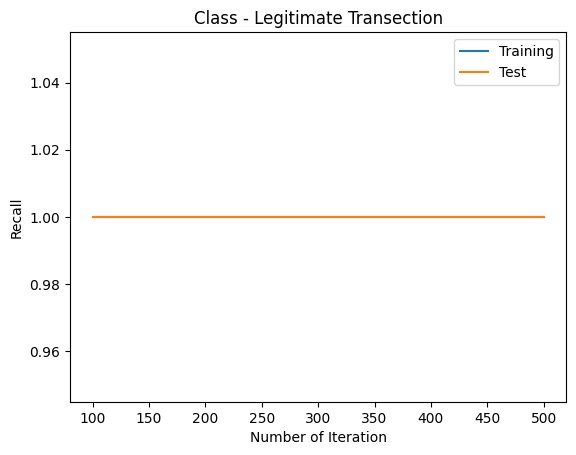

In [3]:
x = [100, 200, 500]
y_train = [1, 1, 1]
y_test = [1, 1, 1]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Number of Iteration')
plt.ylabel('Recall')
plt.title('Class - Legitimate Transection')

Text(0.5, 1.0, 'Class - Fraud Transection')

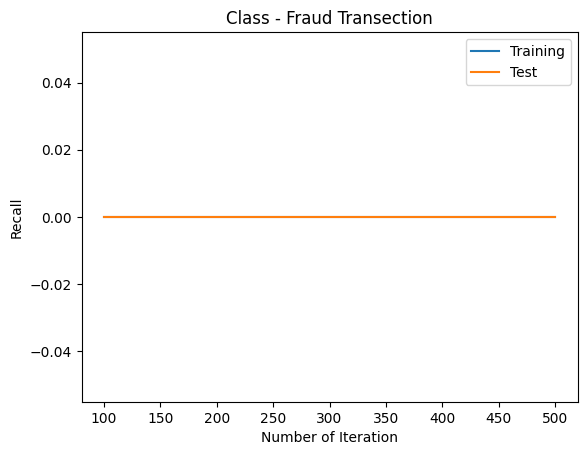

In [4]:
x = [100, 200, 500]
y_train = [0, 0, 0]
y_test = [0, 0, 0]
plt.plot(x,y_train, label = "Training")
plt.plot(x,y_test, label = "Test")
plt.legend()
plt.xlabel('Number of Iteration')
plt.ylabel('Recall')
plt.title('Class - Fraud Transection')